# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
!pip install citipy

     ---------------------------------------- 0.0/675.6 kB ? eta -:--:--
     --------- ---------------------------- 174.1/675.6 kB 3.5 MB/s eta 0:00:01
     -------------------------------------- 675.6/675.6 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for citipy: filename=citipy-0.0.6-py3-none-any.whl size=675977 sha256=6e273ba659841b3f066806402e00ddf658cc81b3e2b2c86f4ee667426fe42ce5
  Stored in directory: c:\users\cluge\appdata\local\pip\cache\wheels\41\82\37\8bb56372b0d828d226b83e0117780ecbe9f409100ac52364bd
Successfully built citipy


In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [29]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        #Variables were taken from the API webpage
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | inarajan village
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | port mathurin
Processing Record 5 of Set 1 | mahanoro
Processing Record 6 of Set 1 | shalqar
Processing Record 7 of Set 1 | hamilton
Processing Record 8 of Set 1 | ha'il
Processing Record 9 of Set 1 | longyearbyen
Processing Record 10 of Set 1 | wharton
Processing Record 11 of Set 1 | zheleznodorozhnyy
Processing Record 12 of Set 1 | beloyarskiy
Processing Record 13 of Set 1 | vorgashor
Processing Record 14 of Set 1 | kavaratti
Processing Record 15 of Set 1 | mukalla
Processing Record 16 of Set 1 | uige
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | soio
Processing Record 20 of Set 1 | st. john's
Processing Record 21 of Set 1 | grytviken
Processing Record 22 of Set 1 | lebu
Processing Record 23 of Set 1 

Processing Record 36 of Set 4 | tazacorte
Processing Record 37 of Set 4 | puerto armuelles
Processing Record 38 of Set 4 | atafu village
Processing Record 39 of Set 4 | acapulco de juarez
Processing Record 40 of Set 4 | breyten
Processing Record 41 of Set 4 | roma
Processing Record 42 of Set 4 | puerto san carlos
City not found. Skipping...
Processing Record 43 of Set 4 | novozybkov
Processing Record 44 of Set 4 | san salvador de jujuy
Processing Record 45 of Set 4 | punta del este
Processing Record 46 of Set 4 | magadan
Processing Record 47 of Set 4 | puerto deseado
Processing Record 48 of Set 4 | saipan
Processing Record 49 of Set 4 | trinidad
Processing Record 0 of Set 5 | tual
Processing Record 1 of Set 5 | port elizabeth
Processing Record 2 of Set 5 | dudinka
Processing Record 3 of Set 5 | puerto baquerizo moreno
Processing Record 4 of Set 5 | san antonio de pale
Processing Record 5 of Set 5 | coquimbo
Processing Record 6 of Set 5 | capela
Processing Record 7 of Set 5 | floro
Proc

Processing Record 29 of Set 8 | sindirgi
Processing Record 30 of Set 8 | santarem
Processing Record 31 of Set 8 | ambalangoda
Processing Record 32 of Set 8 | vadso
Processing Record 33 of Set 8 | totness
Processing Record 34 of Set 8 | rio turbio
City not found. Skipping...
Processing Record 35 of Set 8 | alofi
Processing Record 36 of Set 8 | thaton
Processing Record 37 of Set 8 | maraba
Processing Record 38 of Set 8 | praya
Processing Record 39 of Set 8 | villa bruzual
Processing Record 40 of Set 8 | caianu mic
Processing Record 41 of Set 8 | tukrah
Processing Record 42 of Set 8 | suoyarvi
Processing Record 43 of Set 8 | bayan nur
City not found. Skipping...
Processing Record 44 of Set 8 | sogndal
Processing Record 45 of Set 8 | ta`u
Processing Record 46 of Set 8 | tagta
Processing Record 47 of Set 8 | sergeyevka
Processing Record 48 of Set 8 | salinas
Processing Record 49 of Set 8 | yongning
Processing Record 0 of Set 9 | kasempa
Processing Record 1 of Set 9 | siwa oasis
Processing R

Processing Record 21 of Set 12 | dajal
Processing Record 22 of Set 12 | shilin
Processing Record 23 of Set 12 | rapar
Processing Record 24 of Set 12 | mount holly
Processing Record 25 of Set 12 | nabire
Processing Record 26 of Set 12 | little rock
Processing Record 27 of Set 12 | north bend
Processing Record 28 of Set 12 | jinchang
Processing Record 29 of Set 12 | bahia de kino
Processing Record 30 of Set 12 | dublin
Processing Record 31 of Set 12 | ravar
Processing Record 32 of Set 12 | mugia
Processing Record 33 of Set 12 | yorkton
Processing Record 34 of Set 12 | lubango
Processing Record 35 of Set 12 | manhattan
Processing Record 36 of Set 12 | antonio enes
Processing Record 37 of Set 12 | save
Processing Record 38 of Set 12 | 'anah
City not found. Skipping...
Processing Record 39 of Set 12 | lae
Processing Record 40 of Set 12 | nieuw amsterdam
Processing Record 41 of Set 12 | guerrero negro
Processing Record 42 of Set 12 | nelson bay
Processing Record 43 of Set 12 | shache
Process

In [30]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [31]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,11.01,77,81,4.92,NZ,1698379171
1,inarajan village,13.2736,144.7484,28.54,94,76,3.15,GU,1698379355
2,ushuaia,-54.8000,-68.3000,2.81,52,0,0.51,AR,1698379177
3,port mathurin,-19.6833,63.4167,24.67,77,66,5.91,MU,1698379186
4,mahanoro,-19.9000,48.8000,24.19,88,45,2.52,MG,1698379355


In [32]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [33]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,11.01,77,81,4.92,NZ,1698379171
1,inarajan village,13.2736,144.7484,28.54,94,76,3.15,GU,1698379355
2,ushuaia,-54.8000,-68.3000,2.81,52,0,0.51,AR,1698379177
3,port mathurin,-19.6833,63.4167,24.67,77,66,5.91,MU,1698379186
4,mahanoro,-19.9000,48.8000,24.19,88,45,2.52,MG,1698379355


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

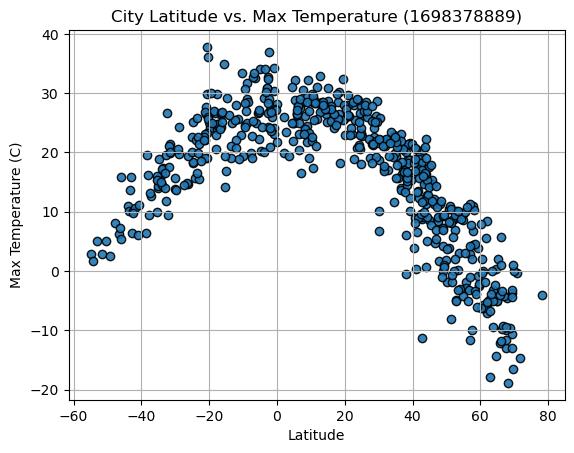

In [34]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=0.9, edgecolors='k')

# Incorporate the other graph properties
date=city_data_df["Date"].min()
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig(r"C:\Users\cluge\Challenge Uploads\Unit 6\Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

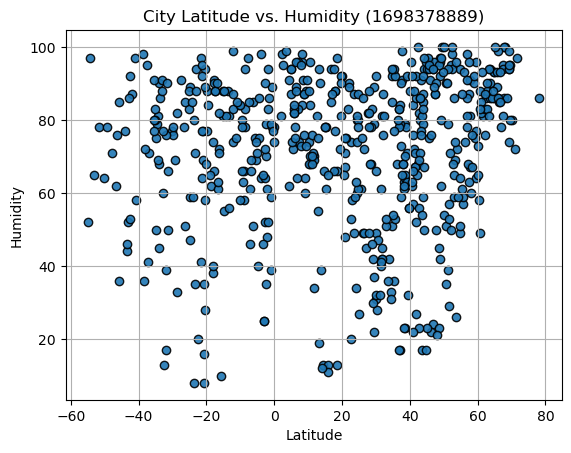

In [35]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=0.9, edgecolors="k")

# Incorporate the other graph properties
date=city_data_df["Date"].min()
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()

# Save the figure
plt.savefig(r"C:\Users\cluge\Challenge Uploads\Unit 6\Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

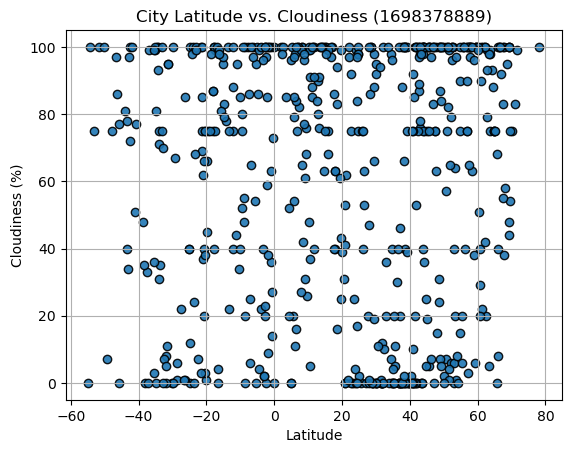

In [36]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=0.9, edgecolors="k")

# Incorporate the other graph properties
date=city_data_df["Date"].min()
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig(r"C:\Users\cluge\Challenge Uploads\Unit 6\Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

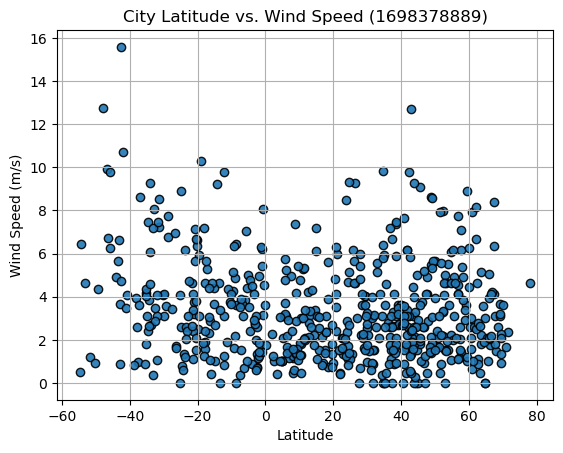

In [37]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=0.9, edgecolors="k")


# Incorporate the other graph properties
date=city_data_df["Date"].min()
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig(r"C:\Users\cluge\Challenge Uploads\Unit 6\Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [39]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df
northern_hemi_df = northern_hemi_df.loc[(northern_hemi_df["Lat"]>=0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,inarajan village,13.2736,144.7484,28.54,94,76,3.15,GU,1698379355
5,shalqar,47.8333,59.6000,1.64,50,100,4.92,KZ,1698379263
6,hamilton,39.1834,-84.5333,21.53,71,75,3.60,US,1698378889
7,ha'il,27.5219,41.6907,19.01,82,20,0.00,SA,1698379355
8,longyearbyen,78.2186,15.6401,-4.09,86,100,4.63,SJ,1698379262


In [40]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df
southern_hemi_df = southern_hemi_df.loc[(southern_hemi_df["Lat"]<0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,11.01,77,81,4.92,NZ,1698379171
2,ushuaia,-54.8000,-68.3000,2.81,52,0,0.51,AR,1698379177
3,port mathurin,-19.6833,63.4167,24.67,77,66,5.91,MU,1698379186
4,mahanoro,-19.9000,48.8000,24.19,88,45,2.52,MG,1698379355
15,uige,-7.6087,15.0613,19.86,97,100,0.37,AO,1698379356


###  Temperature vs. Latitude Linear Regression Plot

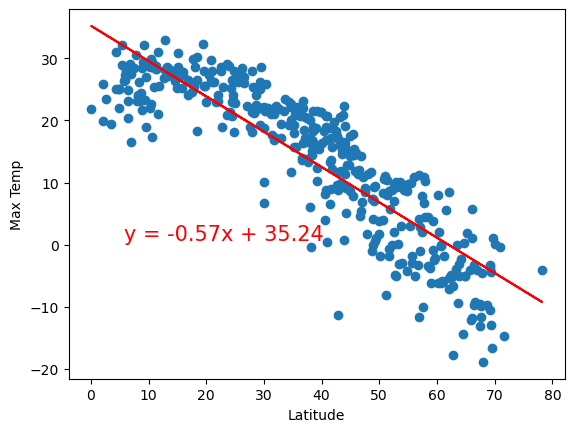

In [41]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

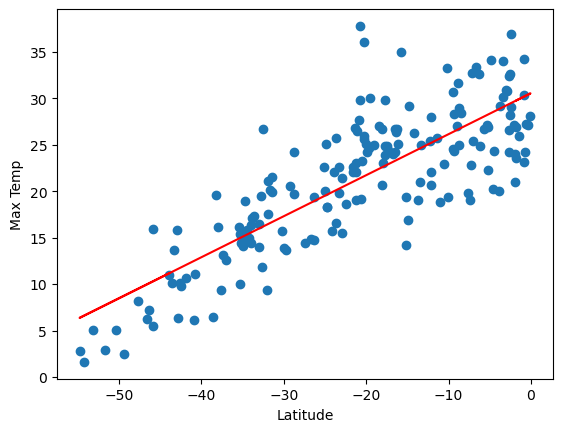

In [42]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

**Discussion about the linear relationship:** In both plot graphs, we can conclude that the latitude position does determine what the max temp would be in that as you get closer to zero (equator) it gets warmer and as you move away it gets cooler.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.01897156204017566


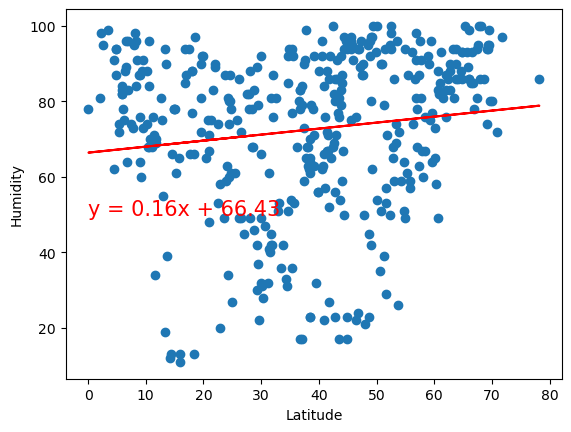

In [43]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 4.739326905357256e-06


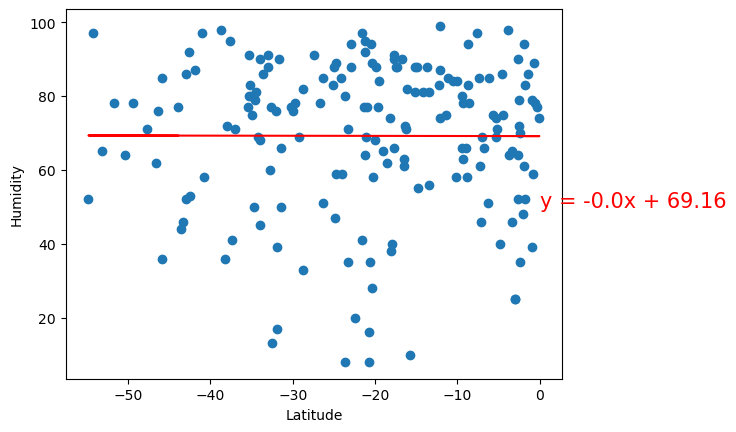

In [44]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** There no relation between Latitude and Humidity as can bee seen in the graphs above

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0023175020110189222


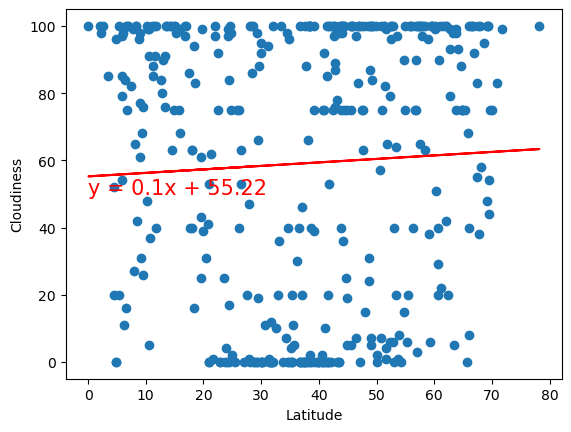

In [45]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.0007227724547820465


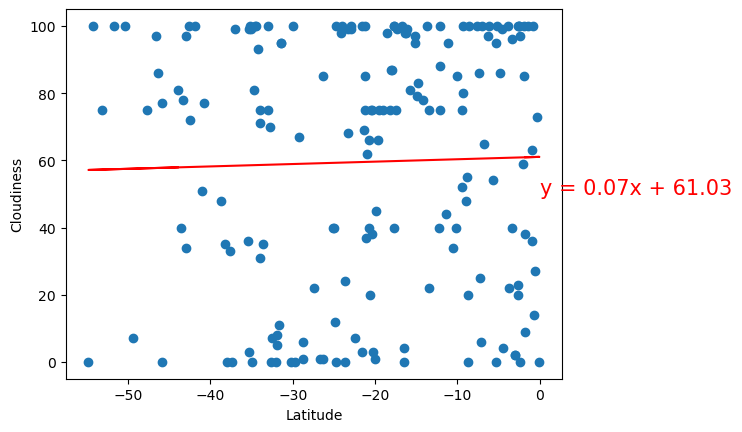

In [46]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** There no linear relation between Latitude and Cloudiness as can bee seen in the graphs above

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.010799112811750977


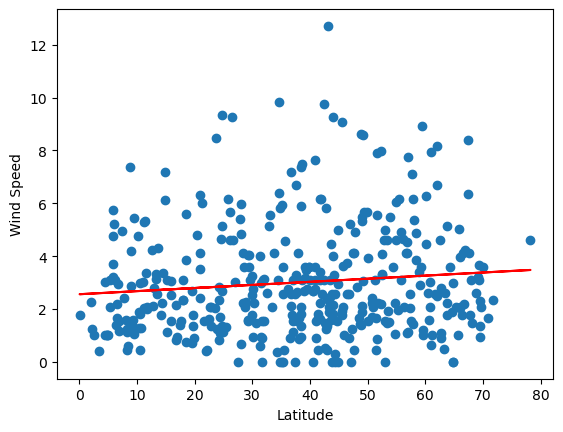

In [47]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.06349940349870013


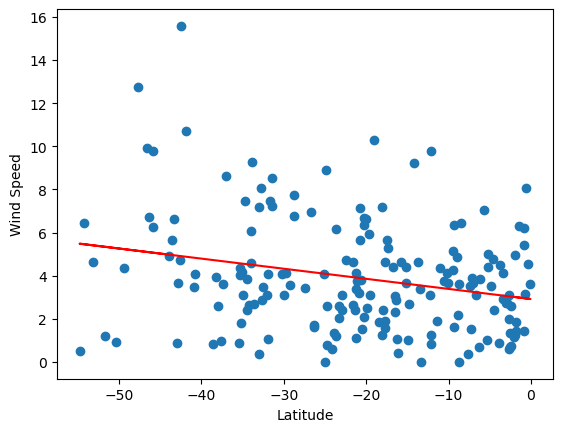

In [48]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** There no linear relation between Latitude and Wind Speed as can bee seen in the graphs above